In [1]:
# Importing the libraries that I will use throughout this project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
# Reading Data
train_df = pd.read_csv("../input/capstone/train_data-1646154868194.csv")
test_df = pd.read_csv("../input/capstone/test_data-1646154813929.csv")

In [3]:
#Check the head of the train data
train_df.head()

,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0
3,2015,1,2,1,4,24.0
4,2015,1,2,1,5,8.0


In [4]:
#Check the head of the test data
test_df.head()

,id,year,month,day,city,medicine
0,1,2018,7,1,1,1292
1,2,2018,7,1,1,1
2,3,2018,7,1,1,2
3,4,2018,7,1,1,3
4,5,2018,7,1,1,4


In [5]:
#Checking the shape of the train data
train_df.shape

(22624345, 6)

In [6]:
#Checking the shape of the test data
test_df.shape

(773535, 6)

In [7]:
# Info of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22624345 entries, 0 to 22624344
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      int64  
 1   month     int64  
 2   day       int64  
 3   city      int64  
 4   medicine  int64  
 5   sales     float64
dtypes: float64(1), int64(5)
memory usage: 1.0 GB


In [8]:
# Info of the test data
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773535 entries, 0 to 773534
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        773535 non-null  int64
 1   year      773535 non-null  int64
 2   month     773535 non-null  int64
 3   day       773535 non-null  int64
 4   city      773535 non-null  int64
 5   medicine  773535 non-null  int64
dtypes: int64(6)
memory usage: 35.4 MB


In [9]:
# Checking the descriptive stats of the train data
train_df.describe(include='all')

,year,month,day,city,medicine,sales
count,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07
mean,2.016510e+03,6.220520e+00,1.572557e+01,5.488639e+00,1.169635e+03,5.166032e+01
std,1.023379e+00,3.449989e+00,8.789664e+00,2.849396e+00,8.016848e+02,1.100297e+02
min,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.948000e+03
25%,2.016000e+03,3.000000e+00,8.000000e+00,3.000000e+00,5.110000e+02,1.200000e+01
50%,2.017000e+03,6.000000e+00,1.600000e+01,5.000000e+00,1.034000e+03,2.800000e+01
75%,2.017000e+03,9.000000e+00,2.300000e+01,8.000000e+00,1.718000e+03,5.600000e+01
max,2.018000e+03,1.200000e+01,3.100000e+01,1.000000e+01,3.389000e+03,8.299200e+04


*  Year column spans from 2015 - 2018
*  Month column spans from Jan to Dec
*  Date column is from 1 to 31
*  10 different cities
*  3389 unique medicines
*  There are some sales values that are in negative.

In [10]:
# Checking the descriptive stats of the test data
test_df.describe(include='all')

,id,year,month,day,city,medicine
count,773535.000000,773535.0,773535.0,773535.000000,773535.000000,773535.000000
mean,386768.000000,2018.0,7.0,15.971202,5.498414,1589.581626
std,223300.464576,0.0,0.0,9.002002,2.845757,978.991995
min,1.000000,2018.0,7.0,1.000000,1.000000,1.000000
25%,193384.500000,2018.0,7.0,8.000000,3.000000,728.000000
50%,386768.000000,2018.0,7.0,16.000000,5.000000,1571.000000
75%,580151.500000,2018.0,7.0,24.000000,8.000000,2419.000000
max,773535.000000,2018.0,7.0,31.000000,10.000000,3423.000000


### Preprocessing

In [11]:
# Checking for duplicate entries
train_df.duplicated().sum()

1827

In [12]:
# Dropping the duplicates
train_df.drop_duplicates(inplace=True)

In [13]:
# Checking for duplicate entries in test data
test_df.duplicated().sum()

0

In [14]:
#Checking for NA values in train & test data
train_df.isna().sum()

year        0
month       0
day         0
city        0
medicine    0
sales       0
dtype: int64

In [15]:
test_df.isna().sum()

id          0
year        0
month       0
day         0
city        0
medicine    0
dtype: int64

### Adding Basic Datetime Features

In [16]:
# Adding a new column called Date to train and test for better analysis
train_df['Date']=pd.to_datetime(train_df[['year','month','day']])

In [17]:
test_df['Date']=pd.to_datetime(test_df[['year','month','day']])

In [18]:
# Adding a day of the week column to both the datasets
train_df['Dayofweek'] = train_df.Date.dt.dayofweek

In [19]:
test_df['Dayofweek'] = test_df.Date.dt.dayofweek

In [20]:
train_df.head()

,year,month,day,city,medicine,sales,Date,Dayofweek
0,2015,1,2,1,1,24.0,2015-01-02,4
1,2015,1,2,1,2,144.0,2015-01-02,4
2,2015,1,2,1,3,84.0,2015-01-02,4
3,2015,1,2,1,4,24.0,2015-01-02,4
4,2015,1,2,1,5,8.0,2015-01-02,4


### Data Analysis

#### How are sales varying across dates ?

In [21]:
df1 = train_df.copy()
df1.drop(['year','month','day','city','medicine'],axis=1,inplace=True)
df1 = df1.groupby(df1['Date']).sum()
daily_sales = go.Scatter(x=df1.index, y=df1['sales'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales], layout=layout)
iplot(fig)

* Sales are on an increasing trend compared to previous year and there are spikes in sales during Dec-Jan and Jun
* Highest amount of sales happened on Feb 28th 2018 and the lowest on Mar 14th 2015

#### Which month has the highest sales ?

In [22]:
df2 = train_df.copy()
df2.drop(['Date','city','year','day','medicine'],axis=1,inplace=True)
df2 = df2.groupby(df2['month']).sum()
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
Monthly_sales = go.Scatter(x=df2.index, y=df2['sales'])
layout = go.Layout(title='Monthly sales', xaxis=dict(title='Month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[Monthly_sales], layout=layout)
iplot(fig)

* March has the highest number of sales. Data does confirm that there's a spike in sales during Jan, Dec an Jun 

#### How do sales vary from the start of the month to the end ?

In [23]:
df3 = train_df.copy()
df3.drop(['Date','city','year','month','medicine'],axis=1,inplace=True)
df3 = df3.groupby(df3['day']).sum()
Date_sales = go.Scatter(x=df3.index, y=df3['sales'])
layout = go.Layout(title='Date sales', xaxis=dict(title='Month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[Date_sales], layout=layout)
iplot(fig)

* Data shows sales are usually higher during the begining of the month

#### Which city has the highest sales ?

In [24]:
df4 = train_df.copy()
df4.drop(['Date','month','year','day','medicine'],axis=1,inplace=True)
df4['city'] = df4['city'].replace({1:'Kolkata',2:'Other',3:'Jaipur',4:'Mumbai',5:'Delhi',6:'Chennai',7:'Bangalore',8:'Hyderabad',9:'Ahmedabad',10:'Lucknow'})
df4 = df4.groupby(df4['city']).sum()
City_sales = go.Scatter(x=df4.index, y=df4['sales'])
layout = go.Layout(title='City sales', xaxis=dict(title='City'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[City_sales], layout=layout)
iplot(fig)

#### Medicine VS Sales

In [25]:
df5 = train_df.copy()
df5.drop(['Date','month','year','day','city'],axis=1,inplace=True)
df5 = df5.groupby(df5['medicine']).sum()
Medicine_sales = go.Scatter(x=df5.index, y=df5['sales'])
layout = go.Layout(title='Medicine Sales', xaxis=dict(title='Medicine'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[Medicine_sales], layout=layout)
iplot(fig)

*  Medicine 1077 has the highest amount of sales. 
*  A lot of medicines have less than 500k sales across all three years. Especially the ones in 3000 series which have less then 10000 sales.

#### Does Weekends have any impact on sales ?

In [26]:
df6 = train_df.copy()
df6.drop(['Date','month','year','day','city','medicine'],axis=1,inplace=True)
df6 = df6.groupby(df6['Dayofweek']).sum()
Weekly_sales = go.Scatter(x=df6.index, y=df6['sales'])
layout = go.Layout(title='Weekly sales', xaxis=dict(title='Medicine'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[Weekly_sales], layout=layout)
iplot(fig)

* Monday has the highest number of sales with decline in sales over the week. Increase in sales during Sunday compared to other weekdays. Maybe to due to being a holiday

### Medicine Vs Year
Some medicines showed low sales in the 3000 series. Maybe they were introuced recently?

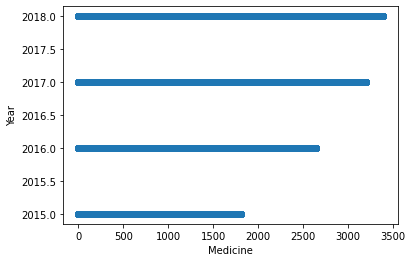

In [27]:
plt.scatter(x='medicine',y='year',data=train_df)
plt.xlabel('Medicine')
plt.ylabel('Year');

* As expected a lot of medicines in the 3000 series were available for sales after 2017 hence the low amount of sales

### Feature Engineering

In [28]:
#Adding new features to train data 
train_df['day_of_year'] = train_df['Date'].dt.day_of_year
train_df['quarter'] = train_df['Date'].dt.quarter
train_df['Date_is_year_start'] = train_df['Date'].dt.is_year_start
train_df['Date_is_year_end'] = train_df['Date'].dt.is_year_end
train_df['Date_is_month_start'] = train_df['Date'].dt.is_month_start
train_df['Date_is_month_end'] = train_df['Date'].dt.is_month_end
train_df['Date_is_weekend'] = np.where(train_df['Dayofweek'].isin([5,6]), 1,0)

In [29]:
# Adding new features to test data
test_df['Dayofweek'] = test_df['Date'].dt.day_of_week
test_df['day_of_year'] = test_df['Date'].dt.day_of_year
test_df['quarter'] = test_df['Date'].dt.quarter
test_df['Date_is_year_start'] = test_df['Date'].dt.is_year_start
test_df['Date_is_year_end'] = test_df['Date'].dt.is_year_end
test_df['Date_is_month_start'] = test_df['Date'].dt.is_month_start
test_df['Date_is_month_end'] = test_df['Date'].dt.is_month_end
test_df['Date_is_weekend'] = np.where(test_df['Dayofweek'].isin([5,6]), 1,0)

### Preprocessing

In [30]:
# Converting bool features to int
train_df["Date_is_year_start"] = train_df["Date_is_year_start"].astype(int)
train_df["Date_is_year_end"] = train_df["Date_is_year_end"].astype(int)
train_df["Date_is_month_start"] = train_df["Date_is_month_end"].astype(int)
train_df["Date_is_month_end"] = train_df["Date_is_month_end"].astype(int)
test_df["Date_is_year_start"] = test_df["Date_is_year_start"].astype(int)
test_df["Date_is_year_end"] = test_df["Date_is_year_end"].astype(int)
test_df["Date_is_month_start"] = test_df["Date_is_month_end"].astype(int)
test_df["Date_is_month_end"] = test_df["Date_is_month_end"].astype(int)

In [31]:
# Converting cols to categorical in train data
for col in ['city', 'medicine', 'year', 'month', 'day', 'Dayofweek',
       'day_of_year', 'quarter', 'Date_is_year_start', 'Date_is_year_end',
       'Date_is_month_start', 'Date_is_month_end', 'Date_is_weekend'] :
    train_df[col] = train_df[col].astype('category')

In [32]:
# Converting cols to categorical in test data
for col in ['city', 'medicine', 'year', 'month', 'day', 'Dayofweek',
       'day_of_year', 'quarter', 'Date_is_year_start', 'Date_is_year_end',
       'Date_is_month_start', 'Date_is_month_end', 'Date_is_weekend'] :
    test_df[col] = test_df[col].astype('category')

In [33]:
# Dropping date column for modelling
train_df.drop(['Date'],axis=1,inplace=True)
test_df.drop(['Date'],axis=1,inplace=True)

In [34]:
# Dummification
train_df = pd.get_dummies(train_df, columns=['Dayofweek','city'])
test_df = pd.get_dummies(test_df, columns=['Dayofweek','city'])

### Modelling

In [35]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [36]:
X = train_df.drop(columns='sales',axis=1)
Y = train_df.sales

In [37]:
# Splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [38]:
import lightgbm as lgb
LGB = lgb.LGBMRegressor(num_leaves= 7, max_depth=8, 
                         random_state=42,                          
                         metric='rmse', 
                         n_jobs=-1, 
                         n_estimators=1000,
                         colsample_bytree=0.95,
                         subsample=0.95,
                         learning_rate=0.001)

LGB.fit(X_train, Y_train)
print('Train set mse:', mean_squared_error(Y_train, LGB.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, LGB.predict(X_test)))
print('Test set score:', LGB.score(X_train,Y_train))

Train set mse: 8750.083975167361
Test set mse: 8495.526660660358
Test set score: 0.2804926856653338


### Predicting Sales on test data

In [39]:
test_df.drop(['id'],axis=1,inplace=True)

In [40]:
predictions = LGB.predict(test_df)

In [41]:
pd.DataFrame(predictions).to_csv("scores.csv")